In [81]:
import pandas as pd
import numpy as np 
import pickle
from sklearn.ensemble import *
from sklearn.naive_bayes import *
from sklearn.dummy import *
from sklearn.neighbors import *
from sklearn.tree import * 
from sklearn.calibration import *
from sklearn.linear_model import *
from sklearn.multiclass import *
from sklearn.svm import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.model_selection import train_test_split
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px

In [46]:
df = pd.read_csv('data/spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Some columns, like Unmamed 2,3 and 4 provide no useful information. Therefore, we can remove them. We can also rename the useful columns (v1 and v2)

In [47]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
df['SMS'] = df['v2']
df['label'] = df['v1'].map({'ham':0,'spam':1})
df.drop(['v1','v2'],axis=1,inplace=True)
df.head()


,SMS,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


We could also make another column for the length of each SMS


In [48]:
df['text_length'] = [len(i) for i in df['SMS']]


In [49]:
df.head()

,SMS,label,text_length
0,"Go until jurong point, crazy.. Available only ...",0,111
1,Ok lar... Joking wif u oni...,0,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,U dun say so early hor... U c already then say...,0,49
4,"Nah I don't think he goes to usf, he lives aro...",0,61


Time for some plots! Let's use this new text_length variable to make a barplot

<AxesSubplot:xlabel='text_length', ylabel='Count'>

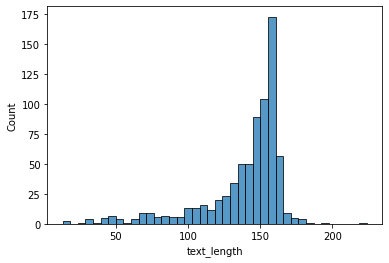

In [50]:
sns.histplot(df[df['label']==1]['text_length'])

Text(0.5, 1.0, 'Text length for ham sms')

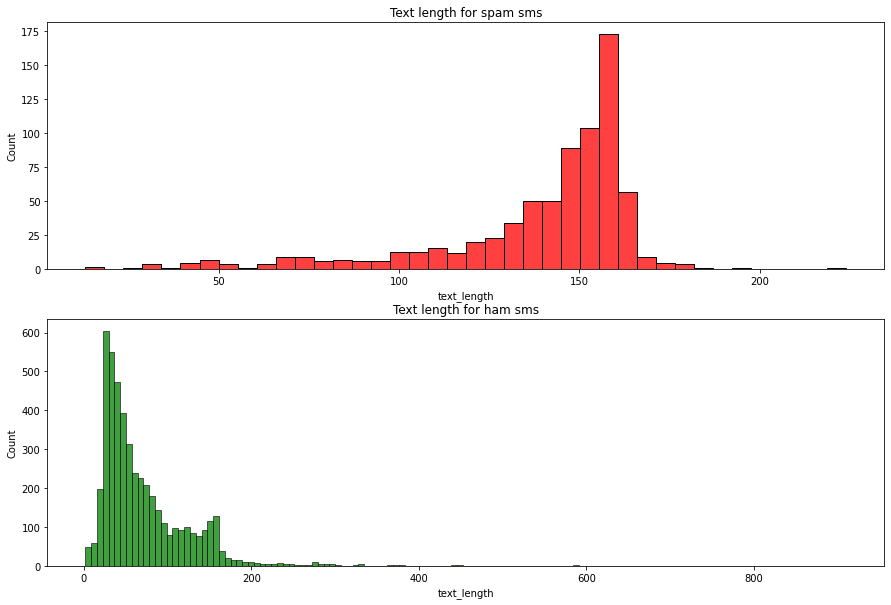

In [51]:
fig,axes = plt.subplots(2,1,figsize=(15,10))

sns.histplot(data=df[df['label']==1]['text_length'],ax=axes[0],color='red')
sns.histplot(data=df[df['label']==0]['text_length'],ax=axes[1],color='green')

axes[0].set_title('Text length for spam sms')
axes[1].set_title('Text length for ham sms')


So, based on these plots, we can conclude that spam messages are mostly written with a length between 150-200, and ham messages are written with a shorter length
Let's also count how many values we got for each one of them

In [52]:
print('Amount of spam messages: ',df[df['label']==1].shape[0])
print('Amount of ham messages: ', df[df['label']==0].shape[0])


Amount of spam messages:  747
Amount of ham messages:  4825


<AxesSubplot:xlabel='label', ylabel='count'>

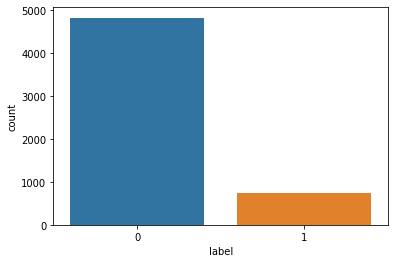

In [53]:
sns.countplot(data=df,x='label')

So based on this we can also see there are more ham messages than spam messages

In [54]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [55]:
df['label']=np.where(df['label']==1,1,0)

In [56]:
spam=[]
ham=[]
spam_class=df[df['label']==1]['SMS']
ham_class=df[df['label']==0]['SMS']


In [57]:
def extract_ham(ham_class):
    global ham
    words = [word.lower() for word in word_tokenize(ham_class) if word.lower() not in stopwords.words('english') and word.lower().isalpha()]
    ham= ham+words
    


In [58]:
def extract_spam(spam_class):
    global spam
    words= [word.lower() for word in word_tokenize(spam_class) if word.lower() not in stopwords.words('english') and word.lower().isalpha()]
    spam = spam+words    

In [59]:
spam_class.apply(extract_spam)
ham_class.apply(extract_ham)

0       None
1       None
3       None
4       None
6       None
        ... 
5565    None
5568    None
5569    None
5570    None
5571    None
Name: SMS, Length: 4825, dtype: object

In [60]:
#£nltk.download('punkt')
#nltk.download('stopwords')


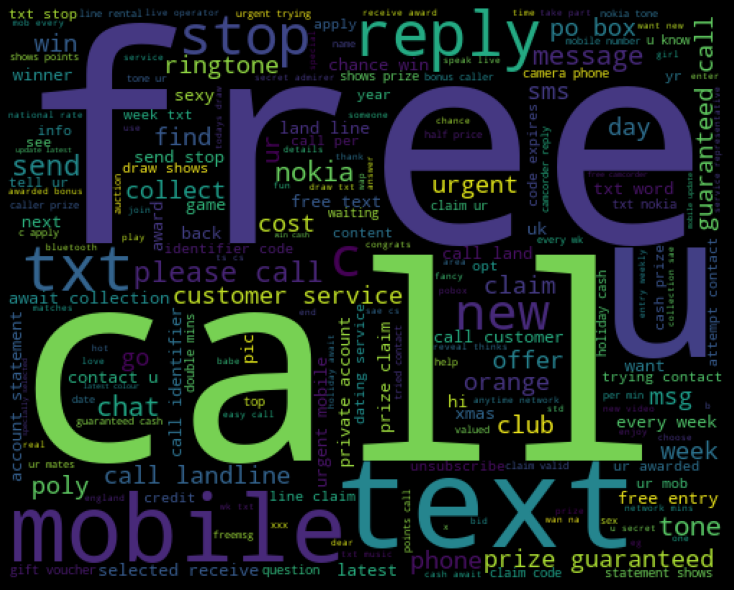

In [61]:
from wordcloud import WordCloud
spam_wcloud = WordCloud(width=500,height=400).generate(" ".join(spam))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_wcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

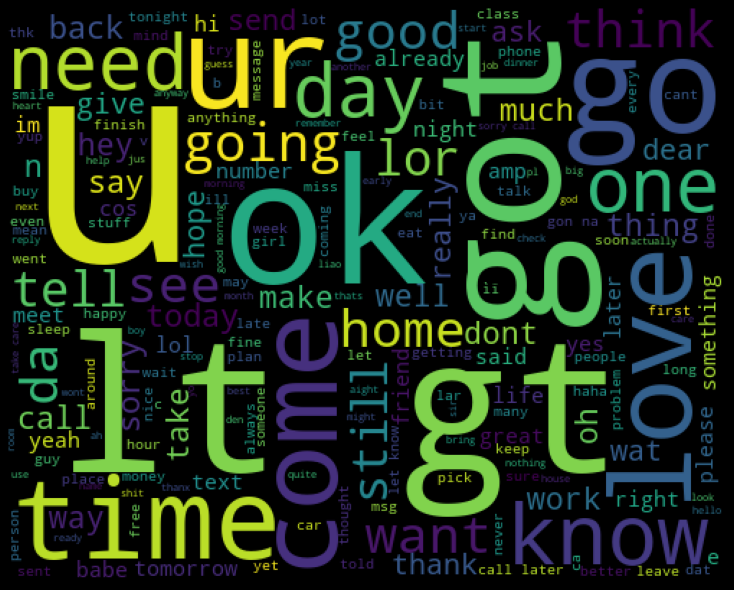

In [62]:
ham_wcloud = WordCloud(width=500,height=400).generate(" ".join(ham))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(ham_wcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

We can also get the top 10 spam words


In [63]:
spam_words = np.array(spam)
pd.Series(spam_words).value_counts().head(10)

call      346
free      219
txt       156
ur        144
u         144
mobile    123
text      121
stop      114
claim     113
reply     104
dtype: int64

And the top 10 ham words as well


In [64]:
ham_words = np.array(ham)
pd.Series(ham_words).value_counts().head(10)

u       989
gt      318
lt      316
get     301
ok      256
go      248
got     242
ur      237
know    236
like    231
dtype: int64

## Words Cleaning
To clean our data, a little bit more, we could also use SnowballStemmer

In [65]:
from nltk.stem import SnowballStemmer
import string
stemmer = SnowballStemmer('english')

In [66]:
def cleanText(message):
    message = message.translate(str.maketrans('','',string.punctuation))
    words = [stemmer.stem(word) for word in message.split() if word.lower() not in stopwords.words('english')]
    return ' '.join(words)


In [67]:
df['SMS'] = df['SMS'].apply(cleanText)

In [68]:
df.head()

,SMS,label,text_length
0,go jurong point crazi avail bugi n great world...,0,111
1,ok lar joke wif u oni,0,29
2,free entri 2 wkli comp win fa cup final tkts 2...,1,155
3,u dun say earli hor u c alreadi say,0,49
4,nah dont think goe usf live around though,0,61


## Data split
We're done with data cleaning. Now we should split or data for test and training


In [69]:
y=df['label']
x=df['SMS']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

## Models
### Logistic Regression
First, we are going to try a Logistic Regression model with a CountVectorizer

In [73]:
def test_models(classifiers,vectorizers,x_train,x_test,y_train,y_test):
    max_score=0
    max_name=0
    for classifier in classifiers:
        for vectorizer in vectorizers:
            #train data
            vectorized_text = vectorizer.fit_transform(x_train)
            classifier.fit(vectorized_text,y_train)

            #score
            vectorized_text = vectorizer.transform(x_test)
            score = classifier.score(vectorized_text,y_test)
            name = classifier.__class__.__name__ + ' with ' + vectorizer.__class__.__name__
            print(name,score)
        if score>max_score:
            max_score = score
            max_name = name 

    print('----------------- Best Model and Vectorizer -----------------')
    print('-------------------------------------------------------------')
    print(max_name,max_score)
    print('-------------------------------------------------------------')


In [74]:
classifiers = [
        BernoulliNB(),
        RandomForestClassifier(n_estimators=100, n_jobs=-1),
        AdaBoostClassifier(),
        BaggingClassifier(),
        ExtraTreesClassifier(),
        GradientBoostingClassifier(),
        DecisionTreeClassifier(),
        CalibratedClassifierCV(),
        DummyClassifier(),
        PassiveAggressiveClassifier(),
        RidgeClassifier(),
        RidgeClassifierCV(),
        SGDClassifier(),
        OneVsRestClassifier(SVC(kernel='linear')),
        OneVsRestClassifier(LogisticRegression()),
        KNeighborsClassifier()
    ]

In [75]:
vectorizers = [
    CountVectorizer(),
    TfidfVectorizer(),
    HashingVectorizer()
]

Now we train models for every kind of combination between classifiers and vectorizers, and we save it into a new dataframe

In [76]:
test_models(classifiers,vectorizers,x_train,x_test,y_train,y_test)

BernoulliNB with CountVectorizer 0.9587443946188341
BernoulliNB with TfidfVectorizer 0.9587443946188341
BernoulliNB with HashingVectorizer 0.8582959641255605
RandomForestClassifier with CountVectorizer 0.9614349775784753
RandomForestClassifier with TfidfVectorizer 0.9596412556053812
RandomForestClassifier with HashingVectorizer 0.9533632286995516
AdaBoostClassifier with CountVectorizer 0.9587443946188341
AdaBoostClassifier with TfidfVectorizer 0.9650224215246637
AdaBoostClassifier with HashingVectorizer 0.9551569506726457
BaggingClassifier with CountVectorizer 0.95695067264574
BaggingClassifier with TfidfVectorizer 0.9506726457399103
BaggingClassifier with HashingVectorizer 0.9596412556053812
ExtraTreesClassifier with CountVectorizer 0.9713004484304932
ExtraTreesClassifier with TfidfVectorizer 0.9668161434977578
ExtraTreesClassifier with HashingVectorizer 0.9560538116591928
GradientBoostingClassifier with CountVectorizer 0.9497757847533632
GradientBoostingClassifier with TfidfVectorize

In [77]:
#Now we train the classifier with the best accuracy
Classifier = CalibratedClassifierCV()
Vectorizer = TfidfVectorizer()
vectorized_text = Vectorizer.fit_transform(x_train)
Classifier.fit(vectorized_text,y_train)

CalibratedClassifierCV()

In [85]:
#Save our trained model
calibrated_classifier_pkl_filename = 'data/calibrated_classifier_03032021.pkl'
tfid_vectorizer_pkl_filename =  'data/tfid_vectorizer_03032021.pkl'
with open(calibrated_classifier_pkl_filename,'wb') as f:
    pickle.dump(Classifier,f)
with open(tfid_vectorizer_pkl_filename,'wb') as fl:
    pickle.dump(Vectorizer,fl)